# Coloring Data Points: Seaborn vs. Matplotlib

TL;DR use `seaborn` for painless approach to color each data point. It is okay to use `matplotlib` for certain cases. I find it easier to use `matplotlib` when trying to create visualization with `colorbar`. See my other notebook, `scatterplot_random.ipynb` on making visualization with `colorbar`. This notebook will extend the use of colorbar.

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For log-based charts
from matplotlib.ticker import ScalarFormatter

In [2]:
# --------------------------------
# The data points, for scatterplot
# --------------------------------

# Generate random numbers
x_ = np.random.normal(size = 50)
y_ = np.random.normal(size = 50)

# Generate categorical values to map color, using .randint() to produce integers
c_ = np.random.randint(low = 1, high = 5, size = 50)

# Create a DataFrame
df = pd.DataFrame({
    'x_': x_,
    'y_': y_,
    'c_': c_
})

## Plot

With `seaborn`, not much thinking is needed to perform this operation. However with `matplotlib`, the data has to be in the correct *form* first. This can be achieved by using the `df.groupby()` function to group the data according to relevant column identifier. To apply color on each data point based on previous grouping, simply run the plotting function in loop.

Coloring in `seaborn`, if the `hue` is numerical, will be a spectrum. Coloring in `matplotlib`, however, with default to discrete.

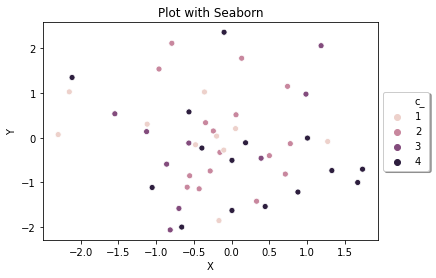

In [3]:
# Instantiate Figure and Axes objects to easily control the chart
fig, ax = plt.subplots()

# Create a plot with seaborn
sns.scatterplot(ax = ax, data = df, x = 'x_', y = 'y_', hue = 'c_')

# Customization
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1, fancybox = True, shadow = True)
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_title('Plot with Seaborn')

# Show plot
plt.show()

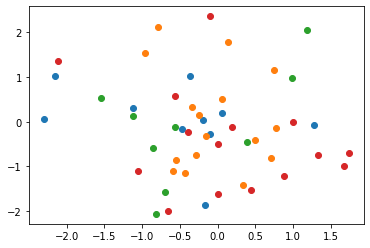

In [4]:
# Instantiate Figure and Axes objects to easily control the plot
fig, ax = plt.subplots()

# Group data for coloring
groups = df.groupby(c_)

# Create plot with matplotlib with a looper
for name, group in groups:
    ax.plot(group['x_'], group['y_'], marker = 'o', linestyle = '', label = name)

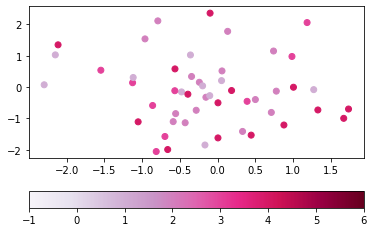

In [5]:
# Make a colormap with matplotlib with additional customizations
points = plt.scatter(df['x_'], df['y_'], c = df['c_'], cmap = 'PuRd', vmin = -1, vmax = 6)
cmap = plt.colorbar(points, orientation = 'horizontal')

## Code Example: Plotting Raw ELISA Data

Since I work with ELISA data quite extensively for my research, here is how I plot them.

Be aware that when using `matplotlib`, use the argument `label` for legend to work. By default, legend in `matplotlib` does not include legend title, whereas `seaborn` does include legend title.

In [6]:
# ---------------
# The data points
# ---------------

# The lists
reciprocal_dilution = [10, 20, 40, 80, 160, 320, 640, 1280]
antigen_A = [1.5, 1.3, 1.1, 0.83, 0.49, 0.21, 0.13, 0.08]
antigen_B = [1.77, 1.43, 1.21, 0.83, 0.51, 0.27, 0.17, 0.09]

# zippped list
elisa_raw = list(zip(reciprocal_dilution, antigen_A, antigen_B))

# DataFrame
df_wide = pd.DataFrame(elisa_raw, columns = ['Dilution', 'Ag. A', 'Ag. B'])

# Melt DataFrame from wide to long format
df_long = pd.melt(df_wide, id_vars = ['Dilution'], value_vars = ['Ag. A', 'Ag. B'], 
                  var_name = 'Antigen', value_name = 'OD405')

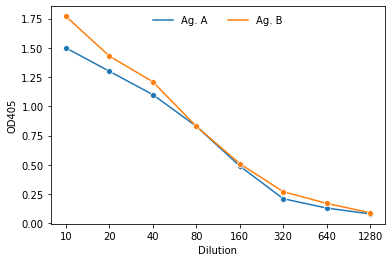

In [7]:
# -------------
# Using seaborn
# -------------

# Instantiate Figure and Axes objects
fig, ax = plt.subplots()

# Create the plot
sns.lineplot(ax = ax, data = df_long, x = 'Dilution', y = 'OD405', hue = 'Antigen', marker = 'o')

# Customizing legends, remove legend title
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles = handles[1:], labels = labels[1:], frameon = False, loc = 'upper center', ncol = 2)

# Log-aware xticks
ax.set_xscale('log', basex = 2)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xticks([10, 20, 40, 80, 160, 320, 640, 1280])

# Show plot
plt.show()

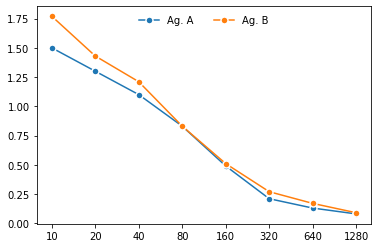

In [8]:
# -----------------------
# Using matplotlib.pyplot
# -----------------------

# Instantiate Figure and Axes objects
fig, ax = plt.subplots()

# Group data
groups = df_long.groupby('Antigen')

# Plot data
for name, group in groups:
    ax.plot(group['Dilution'], group['OD405'], label = name,
            marker = 'o', markersize = 7, markeredgewidth = 1.5, markeredgecolor = 'w')
    
# Log-aware xticks
ax.set_xscale('log', basex = 2)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xticks([10, 20, 40, 80, 160, 320, 640, 1280])

# Legend, fancy or simple
ax.legend(loc = 'upper center', ncol = 2, bbox_to_anchor = (0.5, 1.05), fancybox = True, shadow = True)
ax.legend(frameon = False, loc = 'upper center', ncol = 2)

# Show plot
plt.show()